In [515]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas
import shapely.affinity
from shapely.geometry import Point
import geopy
import geopy.distance
import contextily as cx
from contextily import Place
from datetime import datetime



In [516]:

df = pd.read_csv(r'D:\datascience\nyc_taxi_data_2014.csv')
print(df)
df.head()
df.drop(columns=['store_and_fwd_flag','payment_type','fare_amount','surcharge','mta_tax','tip_amount'])


C:\Users\jaish\miniconda3\envs\BM_2350\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


         vendor_id      pickup_datetime     dropoff_datetime  passenger_count  \
0              CMT  2014-01-09 20:45:25  2014-01-09 20:52:31                1   
1              CMT  2014-01-09 20:46:12  2014-01-09 20:55:12                1   
2              CMT  2014-01-09 20:44:47  2014-01-09 20:59:46                2   
3              CMT  2014-01-09 20:44:57  2014-01-09 20:51:40                1   
4              CMT  2014-01-09 20:47:09  2014-01-09 20:53:32                1   
...            ...                  ...                  ...              ...   
14999994       VTS  2014-02-03 19:28:00  2014-02-03 19:37:00                5   
14999995       VTS  2014-02-07 00:55:00  2014-02-07 01:15:00                1   
14999996       VTS  2014-02-03 18:08:00  2014-02-03 19:29:00                1   
14999997       VTS  2014-02-07 00:58:00  2014-02-07 01:12:00                1   
14999998       VTS  2014-02-07 01:05:00  2014-02-07 01:15:00                1   

          trip_distance  pi

vendor_id      pickup_datetime     dropoff_datetime  passenger_count  \
0              CMT  2014-01-09 20:45:25  2014-01-09 20:52:31                1   
1              CMT  2014-01-09 20:46:12  2014-01-09 20:55:12                1   
2              CMT  2014-01-09 20:44:47  2014-01-09 20:59:46                2   
3              CMT  2014-01-09 20:44:57  2014-01-09 20:51:40                1   
4              CMT  2014-01-09 20:47:09  2014-01-09 20:53:32                1   
...            ...                  ...                  ...              ...   
14999994       VTS  2014-02-03 19:28:00  2014-02-03 19:37:00                5   
14999995       VTS  2014-02-07 00:55:00  2014-02-07 01:15:00                1   
14999996       VTS  2014-02-03 18:08:00  2014-02-03 19:29:00                1   
14999997       VTS  2014-02-07 00:58:00  2014-02-07 01:12:00                1   
14999998       VTS  2014-02-07 01:05:00  2014-02-07 01:15:00                1   

          trip_distance  pickup_longitude  pickup_latitude  rate_code  \
0                  0.70        -73.994770        40.736828          1   
1                  1.40        -73.982392        40.773382          1   
2                  2.30        -73.988570        40.739406          1   
3                  1.70        -73.960213        40.770464          1   
4                  0.90        -73.995371        40.717248          1   
...                 ...               ...              ...        ...   
14999994           1.36        -73.991223        40.718037          1   
14999995           4.26        -73.990247        40.737442          1   
14999996          57.84        -73.789527        40.645007          5   
14999997           3.40        -73.983495        40.694153          1   
14999998           2.25        -73.987732        40.721013          1   

          dropoff_longitude  dropoff_latitude  tolls_amount  total_amount  
0                -73.982227         40.731790          0.00          8.90  
1                -73.960449         40.763995          0.00         11.40  
2                -73.986626         40.765217          0.00         14.00  
3                -73.979863         40.777050          0.00         10.20  
4                -73.984367         40.720524          0.00          8.75  
...                     ...               ...           ...           ...  
14999994         -74.000675         40.725737          0.00         10.00  
14999995         -73.991287         40.692535          0.00         20.50  
14999996         -73.776505         40.740790          7.08        160.08  
14999997         -74.005953         40.710922          0.00         17.90  
14999998         -73.972407         40.747463          0.00         10.50  

[14999999 rows x 12 columns]

In [517]:

str_d1 = '2014/01/09 10:15:00.00'
str_d2 = '2014/01/09 10:20:00.00'
d1 = datetime.strptime(str_d1, "%Y/%m/%d %H:%M:%S.%f")
d2 = datetime.strptime(str_d2, "%Y/%m/%d %H:%M:%S.%f")
df['pickup_datetime'] =  pd.to_datetime(df['pickup_datetime'])
df = df[df['pickup_datetime'] > d1]
df = df[df['pickup_datetime'] < d2]


vendor_id              object
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
trip_distance         float64
pickup_longitude      float64
pickup_latitude       float64
rate_code               int64
store_and_fwd_flag     object
dropoff_longitude     float64
dropoff_latitude      float64
payment_type           object
fare_amount           float64
surcharge             float64
mta_tax               float64
tip_amount            float64
tolls_amount          float64
total_amount          float64
dtype: object
<class 'pandas.core.series.Series'>
720447    2014-01-09 10:19:24
720772    2014-01-09 10:19:30
720775    2014-01-09 10:18:34
721025    2014-01-09 10:19:22
735897    2014-01-09 10:17:36
                  ...        
8454415   2014-01-09 10:17:00
8454618   2014-01-09 10:18:00
8454651   2014-01-09 10:17:00
8455492   2014-01-09 10:17:00
8457644   2014-01-09 10:16:00
Name: pickup_datetime, Length: 1709, dtype: datetime64[ns]


In [519]:
nybb = geopandas.read_file(geopandas.datasets.get_path('nybb'))
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
cities = geopandas.read_file(geopandas.datasets.get_path('naturalearth_cities'))

In [520]:
import folium
nybb.explore()

         pickup_longitude  pickup_latitude  dropoff_longitude  \
720447         -73.984160        40.721745         -74.001288   
720772         -73.991225        40.750417           0.000000   
720775         -73.981935        40.728116         -74.006161   
721025         -73.960490        40.797523         -73.940852   
735897         -73.975589        40.753009         -73.971158   
...                   ...              ...                ...   
8454415        -73.976715        40.751747         -73.977335   
8454618        -73.942685        40.841022         -73.932900   
8454651        -73.998347        40.735237         -73.973070   
8455492        -73.985702        40.752902         -73.872757   
8457644        -73.788357        40.647412         -73.985733   

         dropoff_latitude  
720447          40.715488  
720772           0.000000  
720775          40.723593  
721025          40.824298  
735897          40.761183  
...                   ...  
8454415         40.7523

<AxesSubplot: >

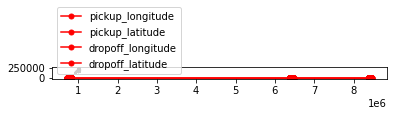

In [521]:
dfl = pd.DataFrame(df,columns= ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'])
gdf = dfl
print(gdf)
base = nybb.plot(color='white', edgecolor='black')
gdf.plot(ax=base, marker='o', color='red', markersize=5)

In [522]:
nybb.crs

<Derived Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [523]:
df_wm = nybb.to_crs(epsg=3857)

In [524]:
nyc = Place("New york city")
nyc_coordinates=nyc.bbox
dfl = dfl[dfl['pickup_longitude']>nyc_coordinates[0]]
dfl = dfl[dfl['pickup_longitude']<nyc_coordinates[2]]
dfl = dfl[dfl['pickup_latitude']>nyc_coordinates[1]]
dfl = dfl[dfl['pickup_latitude']<nyc_coordinates[3]]
dfl = dfl[dfl['dropoff_longitude']>nyc_coordinates[0]]
dfl = dfl[dfl['dropoff_longitude']<nyc_coordinates[2]]
dfl = dfl[dfl['dropoff_latitude']>nyc_coordinates[1]]
dfl = dfl[dfl['dropoff_latitude']<nyc_coordinates[3]]


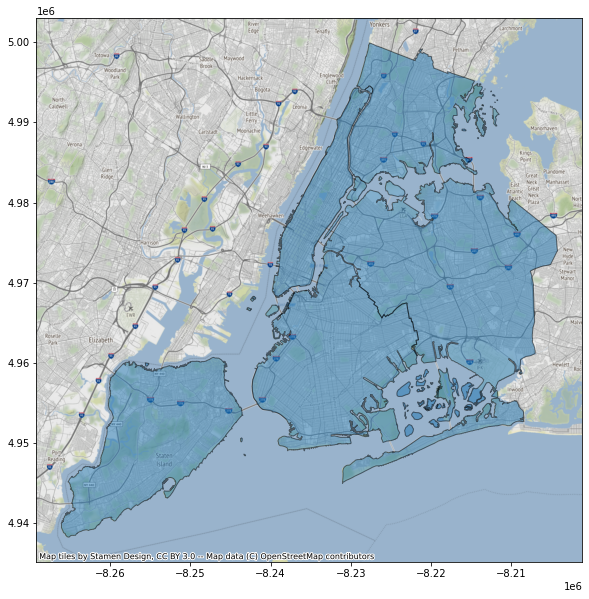

In [525]:
ax = df_wm.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
cx.add_basemap(ax, zoom=12)

In [526]:

Y = pd.DataFrame(dfl,columns= ['pickup_longitude'])
#Y = Y.head(num)
X = pd.DataFrame(dfl,columns= ['pickup_latitude'])
#X = X.head(num)
print(X['pickup_latitude'].dtypes)
print(Y['pickup_longitude'].dtypes)
print(nyc.longitude,nyc.latitude)
print(nyc.bbox_map)
print(nyc.bbox)
print(X,Y)
#w, s, e, n = (40.476578,40.91763,-74.258843,-73.700233)
#_=cx.bounds2raster(w,s,e,n,ll=True,path="new york.tif",source=cx.providers.CartoDB.Positron)
#dfl=dfl.to_crs(epsg=3857)



float64
float64
-74.0060152 40.7127281
(-8277212.918945165, -8198941.401981145, 4931105.568733289, 5009377.08569731)
[-74.258843, 40.476578, -73.700233, 40.91763]
         pickup_latitude
720447         40.721745
720775         40.728116
721025         40.797523
735897         40.753009
737120         40.768763
...                  ...
8454415        40.751747
8454618        40.841022
8454651        40.735237
8455492        40.752902
8457644        40.647412

[1683 rows x 1 columns]          pickup_longitude
720447         -73.984160
720775         -73.981935
721025         -73.960490
735897         -73.975589
737120         -73.981790
...                   ...
8454415        -73.976715
8454618        -73.942685
8454651        -73.998347
8455492        -73.985702
8457644        -73.788357

[1683 rows x 1 columns]


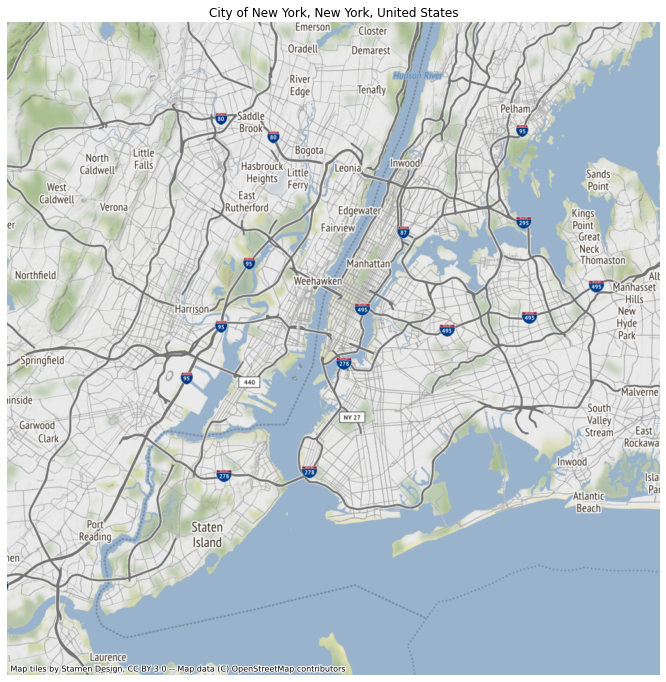

In [527]:
#nyc_points = [Point(x,y) for x,y in zip(X,Y)]
#nyc_points = nyc_points[1:]
#print(nyc_points)




#nyc = Place('new york city')
ax = nyc.plot()

epsg:3857
                                     0
0     POINT (-8235879.018 4971385.345)
1     POINT (-8235631.332 4972321.172)
2     POINT (-8233244.086 4982522.069)
3     POINT (-8234924.899 4975978.525)
4     POINT (-8235615.191 4978293.857)
...                                ...
1678  POINT (-8235050.244 4975793.075)
1679  POINT (-8231262.042 4988920.650)
1680  POINT (-8237458.308 4973367.270)
1681  POINT (-8236050.673 4975962.801)
1682  POINT (-8214082.328 4960473.297)

[1683 rows x 1 columns]
[-74.258843, 40.476578, -73.700233, 40.91763]


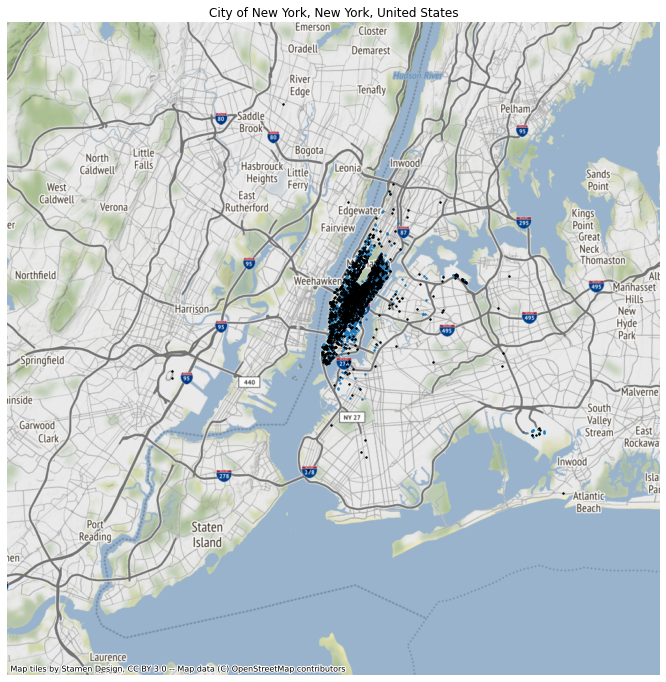

In [528]:

df1 = geopandas.points_from_xy(Y,X)
df2 = geopandas.points_from_xy(dfl['dropoff_longitude'],dfl['dropoff_latitude'])

df1 = geopandas.GeoDataFrame(df1, geometry = 0,crs="epsg:4326").to_crs(3857)
df2 = geopandas.GeoDataFrame(df2, geometry = 0,crs="epsg:4326").to_crs(3857)


print(df1.crs)
print(df1)
print(nyc.bbox)

ax=nyc.plot()
ax2 = df1.plot(ax=ax, markersize=2)
ax3 = df2.plot(ax=ax, markersize=2,c="black")


In [529]:
manhattan = Place("manhattan,new york city")
coordinates_manhattan=manhattan.bbox
print(coordinates_manhattan)
print(gdf)


[-74.047207, 40.679654, -73.906769, 40.882012]
         pickup_longitude  pickup_latitude  dropoff_longitude  \
720447         -73.984160        40.721745         -74.001288   
720772         -73.991225        40.750417           0.000000   
720775         -73.981935        40.728116         -74.006161   
721025         -73.960490        40.797523         -73.940852   
735897         -73.975589        40.753009         -73.971158   
...                   ...              ...                ...   
8454415        -73.976715        40.751747         -73.977335   
8454618        -73.942685        40.841022         -73.932900   
8454651        -73.998347        40.735237         -73.973070   
8455492        -73.985702        40.752902         -73.872757   
8457644        -73.788357        40.647412         -73.985733   

         dropoff_latitude  
720447          40.715488  
720772           0.000000  
720775          40.723593  
721025          40.824298  
735897          40.761183  
... 

         pickup_longitude
720447         -73.984160
720775         -73.981935
721025         -73.960490
735897         -73.975589
737120         -73.981790
...                   ...
8454378        -73.982607
8454412        -73.989557
8454415        -73.976715
8454618        -73.942685
8454651        -73.998347

[1598 rows x 1 columns]


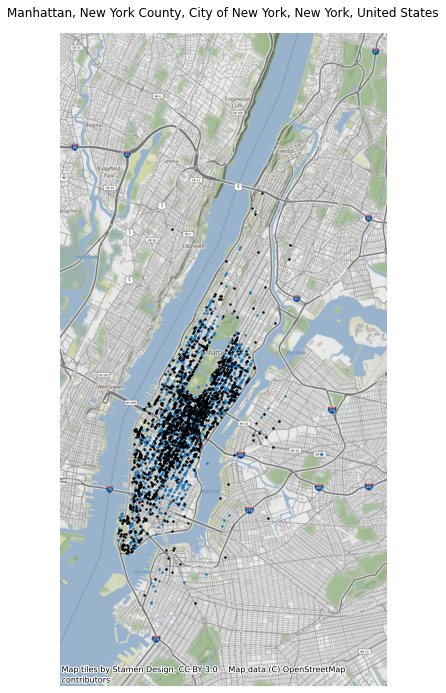

In [530]:
gdf = gdf[gdf['pickup_longitude']>coordinates_manhattan[0]]
gdf = gdf[gdf['pickup_longitude']<coordinates_manhattan[2]]
gdf = gdf[gdf['pickup_latitude']>coordinates_manhattan[1]]
gdf = gdf[gdf['pickup_latitude']<coordinates_manhattan[3]]
gdf = gdf[gdf['dropoff_longitude']>coordinates_manhattan[0]]
gdf = gdf[gdf['dropoff_longitude']<coordinates_manhattan[2]]
gdf = gdf[gdf['dropoff_latitude']>coordinates_manhattan[1]]
gdf = gdf[gdf['dropoff_latitude']<coordinates_manhattan[3]]




gdf_pickup = pd.DataFrame(dfl,columns= ['pickup_longitude','pickup_latitude'])
gdf_dropoff = pd.DataFrame(dfl,columns= ['dropoff_longitude','dropoff_latitude'])
Y_man = pd.DataFrame(gdf,columns = ['pickup_longitude'])
print(Y_man)
X_man = pd.DataFrame(gdf,columns = ['pickup_latitude'])
gdf1 = geopandas.points_from_xy(Y_man,X_man)
gdf2 = geopandas.points_from_xy(gdf['dropoff_longitude'],gdf['dropoff_latitude'])
gdf1 = geopandas.GeoDataFrame(gdf1, geometry = 0,crs="epsg:4326").to_crs(3857)
gdf2 = geopandas.GeoDataFrame(gdf2, geometry = 0,crs="epsg:4326").to_crs(3857)
ax_man=manhattan.plot()
ax_man_2 = gdf1.plot(ax=ax_man, markersize=2)
ax_man_3 = gdf2.plot(ax=ax_man,markersize=2,c="black")

In [531]:
from sklearn.cluster import KMeans

C:\Users\jaish\miniconda3\envs\BM_2350\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\jaish\miniconda3\envs\BM_2350\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\jaish\miniconda3\envs\BM_2350\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\jaish\miniconda3\envs\BM_2350\lib\site-packages\sklearn\cluster\_kmeans.py:1334: User

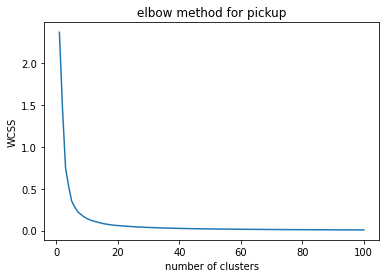

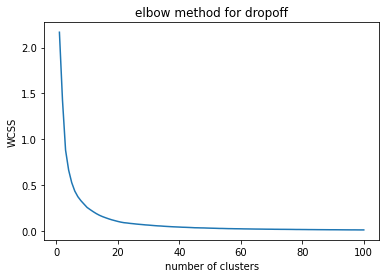

In [532]:
wcss1 = []
wcss2 = []
for i in range (100):
    kmeans= KMeans( n_clusters=i+1 , init= "k-means++", max_iter= 300 , n_init=100)
    kmeans.fit(gdf_pickup)
    wcss1.append(kmeans.inertia_)
    kmeans2= KMeans( n_clusters=i+1 , init= "k-means++", max_iter= 300 , n_init=100)
    kmeans2.fit(gdf_dropoff)
    wcss2.append(kmeans2.inertia_)
plt.plot(range(1,101),wcss1)
plt.title("elbow method for pickup")
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()
plt.plot(range(1,101),wcss2)
plt.title("elbow method for dropoff")
plt.xlabel("number of clusters")
plt.ylabel("WCSS")
plt.show()


In [533]:
y_predicted_pick=kmeans.fit_predict(gdf_pickup)
y_predicted_drop=kmeans.fit_predict(gdf_dropoff)

C:\Users\jaish\miniconda3\envs\BM_2350\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(
C:\Users\jaish\miniconda3\envs\BM_2350\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=7.
  warnings.warn(


In [534]:
print(max(y_predicted_pick))

99


In [535]:
gdf_pickup['cluster']=y_predicted_pick
stops_pick=[(x,y) for x,y in zip(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1])]
print(stops_pick)

gdf_dropoff['cluster']=y_predicted_drop
stops_drop=[(x,y) for x,y in zip(kmeans2.cluster_centers_[:,0],kmeans2.cluster_centers_[:,1])]
print(stops_drop)

[(-73.95299775, 40.777418), (-73.98994608571428, 40.74367222857143), (-73.88591299999999, 40.770857), (-73.98301959259258, 40.757727074074076), (-74.00574716666667, 40.7278916), (-73.78192, 40.646944), (-74.1777185, 40.6928925), (-74.01208385714285, 40.70344357142857), (-73.97006908333333, 40.796006), (-73.97382867391305, 40.76343541304348), (-73.97055499999998, 40.631456666666665), (-73.96214839999999, 40.76589488), (-74.05797699999998, 40.913782), (-74.0055233548387, 40.75046548387097), (-73.97337863157894, 40.745620263157896), (-73.98085695454544, 40.782269863636365), (-73.82153249999999, 40.705004), (-73.86332588888888, 40.76930766666667), (-73.95762625, 40.722655), (-73.9240035, 40.824398), (-74.00394849999999, 40.71448875), (-73.979719, 40.678457), (-73.919118, 40.741980999999996), (-73.826075, 40.74686), (-73.75601899999998, 40.595845), (-73.98912029411764, 40.76883947058823), (-73.99033843589743, 40.7563177948718), (-73.99872104761904, 40.73236357142857), (-73.99893783333333, 4

    Longitude   Latitude
0  -73.952998  40.777418
1  -73.989946  40.743672
2  -73.885913  40.770857
3  -73.983020  40.757727
4  -74.005747  40.727892
..        ...        ...
95 -73.896080  40.756687
96 -74.007230  40.708495
97 -73.978899  40.761206
98 -73.976586  40.748461
99 -73.788516  40.643397

[100 rows x 2 columns]


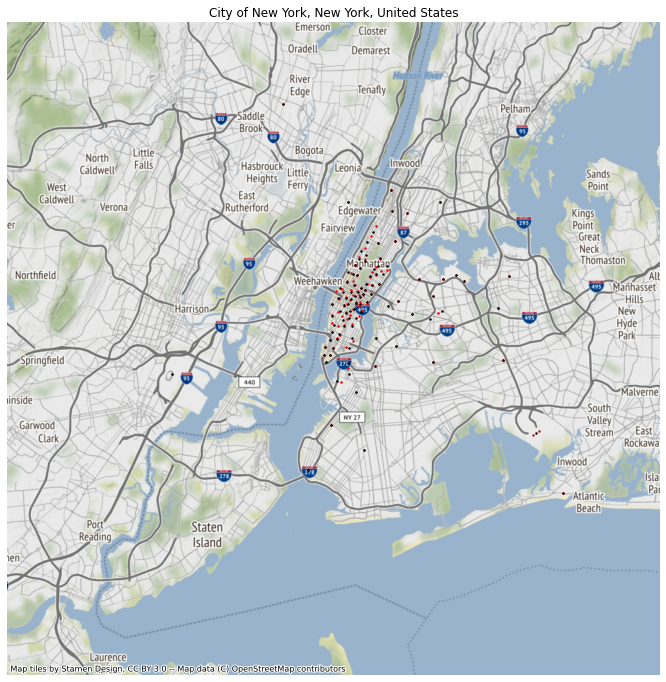

In [536]:
stops_pick=np.array(stops_pick)
stops_drop=np.array(stops_drop)
plot_stops_pick=pd.DataFrame(stops_pick,columns=['Longitude','Latitude'])
plot_stops_drop=pd.DataFrame(stops_drop,columns=['Longitude','Latitude'])
print(plot_stops_pick)
plot_stops1 = geopandas.points_from_xy(plot_stops_pick['Longitude'],plot_stops_pick['Latitude'])
plot_stops1 = geopandas.GeoDataFrame(plot_stops1, geometry = 0,crs="epsg:4326").to_crs(3857)
plot_stops2 = geopandas.points_from_xy(plot_stops_drop['Longitude'],plot_stops_drop['Latitude'])
plot_stops2 = geopandas.GeoDataFrame(plot_stops2, geometry = 0,crs="epsg:4326").to_crs(3857)
ax_stops=nyc.plot()
#ax2=gdf_pickup.plot(ax=ax_stops,markersize=1)
ax_stops_1 = plot_stops1.plot(ax=ax_stops, markersize=2, c="red")
ax_stops_2 = plot_stops2.plot(ax=ax_stops, markersize=2, c='black')

